<a href="https://colab.research.google.com/github/PratyushMaharana/hydrogen-wave-function-/blob/main/hydrogen_wave_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hydrogen Wavefunction Visualizations in Google Colab


<ipython-input-9-d667d4ccd6e6>:20: DeprecationWarning:

`scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.



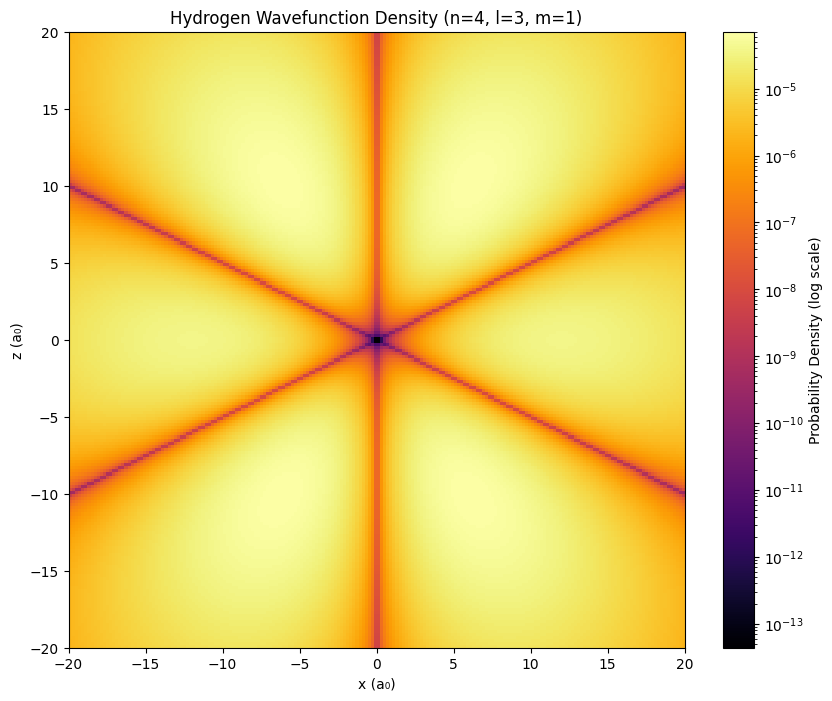

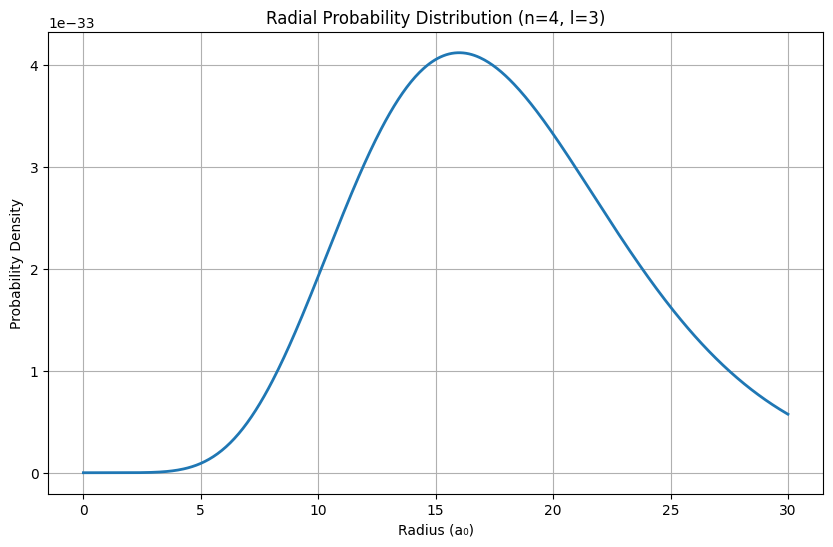

In [9]:
!pip install numpy plotly scipy matplotlib
import numpy as np
from scipy.special import sph_harm_y


#Atomic units
a0 = 1.0  #bohr radius

def hydrogen_wavefunction(n, l, m, r, theta, phi):
    #given quantum numbers
    r = np.where(r == 0, 1e-10, r)

    #radial part
    rho = 2 * r / (n * a0)
    coeff = np.sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)(rho)
    radial = coeff * np.exp(-rho / 2) * rho**l * laguerre

    #angular part
    angular = sph_harm(m, l, phi, theta)

    return radial * angular

def plot_2d_density(n, l, m):
    #Create 2D density plot in x-z plane
    x = np.linspace(-20, 20, 200)
    z = np.linspace(-20, 20, 200)
    X, Z = np.meshgrid(x, z)
    Y = np.zeros_like(X)

    r = np.sqrt(X**2 + Y**2 + Z**2)
    theta = np.arccos(np.clip(Z / r, -1.0, 1.0))  #Avoid invalid values
    phi = np.arctan2(Y, X)

    psi = hydrogen_wavefunction(n, l, m, r, theta, phi)
    density = np.abs(psi)**2

    plt.figure(figsize=(10, 8))
    plt.imshow(density, extent=[-20, 20, -20, 20], cmap='inferno',
               norm=LogNorm(), origin='lower')
    plt.colorbar(label='Probability Density (log scale)')
    plt.xlabel('x (a₀)')
    plt.ylabel('z (a₀)')
    plt.title(f'Hydrogen Wavefunction Density (n={n}, l={l}, m={m})')
    plt.show()

def plot_3d_isosurface(n, l, m):
    x = np.linspace(-20, 20, 40)
    y = np.linspace(-20, 20, 40)
    z = np.linspace(-20, 20, 40)
    X, Y, Z = np.meshgrid(x, y, z)

    r = np.sqrt(X**2 + Y**2 + Z**2)
    theta = np.arccos(np.clip(Z / r, -1.0, 1.0))
    phi = np.arctan2(Y, X)

    psi = hydrogen_wavefunction(n, l, m, r, theta, phi)
    density = np.abs(psi)**2

    threshold = np.max(density) * 0.05

    fig = go.Figure(data=go.Volume(
        x=X.flatten(),
        y=Y.flatten(),
        z=Z.flatten(),
        value=density.flatten(),
        isomin=threshold,
        isomax=np.max(density),
        opacity=0.1,
        surface_count=15,
        colorscale='plasma',
        caps=dict(x_show=False, y_show=False, z_show=False)
    ))

    fig.update_layout(
        title=f'Hydrogen Orbital (n={n}, l={l}, m={m}) Probability Density',
        scene=dict(
            xaxis_title='X (a₀)',
            yaxis_title='Y (a₀)',
            zaxis_title='Z (a₀)',
        ),
        width=800,
        height=600
    )

    fig.show()

def plot_radial_distribution(n, l):
    """Plot radial probability distribution"""
    r = np.linspace(0, 30 * a0, 500)
    theta = np.pi / 2
    phi = 0

    psi = hydrogen_wavefunction(n, l, 0, r, theta, phi)
    radial_density = 4 * np.pi * r**2 * np.abs(psi)**2

    plt.figure(figsize=(10, 6))
    plt.plot(r, radial_density, linewidth=2)
    plt.xlabel('Radius (a₀)')
    plt.ylabel('Probability Density')
    plt.title(f'Radial Probability Distribution (n={n}, l={l})')
    plt.grid(True)
    plt.show()

print("Hydrogen Wavefunction Visualizations in Google Colab")
#put the value of your choice
#with correct formula
plot_2d_density(n=4, l=3, m=1)
plot_3d_isosurface(n=3, l=2, m=1)
plot_radial_distribution(n=4, l=3)
